# eXtreme_Gradient_Boosting_training
- Author: Mako Shibata (s2471259@ed.ac.uk) 
- Date: 27/06/2024
- Aim: Understanding the application of XgBoost training 
- Tutorial: https://datawokagaku.com/xgboost/

XgBoost mechanism: 

- Similar to traditional Boosted Regression Tree.
  -> Use of boosting and ensembling of data. 
  
- Xg does not weight as input variables are passed on from one tree to another. 
- Rather, they 1) calculate the remaining difference from the predictor variables 2) are trained to make this difference smaller. 

Benefits: Scalable, 3 methods for preventing overfitting

1. Use of penalty to reduce weight of f(x) for each tree. 

2. Shrinkage: giving coefficients to each tree's outcome value to reduce influence.

3. Column Subsampling: Random selection of features for each tree. (equivalent to that of Random Forest) 



In [6]:
# install and load packages
%pip install xgboost

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics

Note: you may need to restart the kernel to use updated packages.


In [11]:
# prepare data

ds = sns.load_dataset('titanic')
ds.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
X = ds.loc[:, (ds.columns!= 'survived')&(ds.columns!='alive')]
X = pd.get_dummies(X, drop_first = True)
y = ds['survived']

In [14]:
# split data set into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [22]:
model = XGBClassifier(early_stopping_rounds=10) # early stopping rounds: stops boosting iteration when evaluating indices go no less than 10
eval_set = [(X_test, y_test)] # defining dataset for evaluation (X_test, y_test) when boosting in each iteration
model.fit(X_train, y_train, eval_set=eval_set, verbose=True) # verbose: shows evaluation index for each iteration

[0]	validation_0-logloss:0.57045
[1]	validation_0-logloss:0.51269
[2]	validation_0-logloss:0.48138
[3]	validation_0-logloss:0.46628
[4]	validation_0-logloss:0.45616
[5]	validation_0-logloss:0.45333
[6]	validation_0-logloss:0.45331
[7]	validation_0-logloss:0.45632
[8]	validation_0-logloss:0.45997
[9]	validation_0-logloss:0.46564
[10]	validation_0-logloss:0.46902
[11]	validation_0-logloss:0.47344
[12]	validation_0-logloss:0.48277
[13]	validation_0-logloss:0.48885
[14]	validation_0-logloss:0.49207
[15]	validation_0-logloss:0.49420


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.45330654872506043

<BarContainer object of 22 artists>

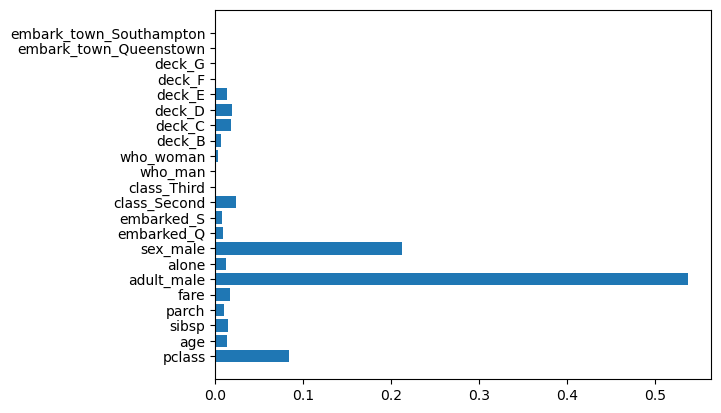

In [24]:
# Visualising feature importance 
model.feature_importances_
plt.barh(X.columns, model.feature_importances_)

# Further Reading 
https://arxiv.org/pdf/1603.02754
XG Boost: A Scalable Tree Boosting System